<a href="https://colab.research.google.com/github/Hyun-ho-Lee/python/blob/main/2021_08_03_Kmeans(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
%matplotlib inline 

iris =load_iris()

irisDF= pd.DataFrame(data=iris.data,columns=['sepal_length','speal_width','petal_length','petal_widht'])
irisDF.head(3)

,sepal_length,speal_width,petal_length,petal_widht
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [14]:
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=300,random_state=0)
kmeans.fit(irisDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [15]:
print(kmeans.labels_)
irisDF.shape,kmeans.labels_.shape

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


((150, 4), (150,))

In [16]:
irisDF['cluster']=kmeans.labels_

In [17]:
irisDF['target']=iris.target
iris_result=irisDF.groupby(['target','cluster'])['sepal_length'].count()
iris_result

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64

In [18]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)

irisDF['pca_x']=pca_transformed[:,0]
irisDF['pca_y']=pca_transformed[:,1]
irisDF.head(3)

,sepal_length,speal_width,petal_length,petal_widht,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


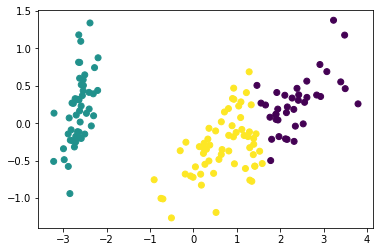

In [19]:
plt.scatter(x=irisDF.loc[:,'pca_x'],y=irisDF.loc[:,'pca_y'],c=irisDF['cluster'])

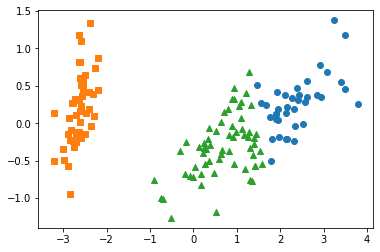

In [20]:
marker0_ind=irisDF[irisDF['cluster']==0].index
marker1_ind=irisDF[irisDF['cluster']==1].index
marker2_ind=irisDF[irisDF['cluster']==2].index

plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'],y=irisDF.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'],y=irisDF.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'],y=irisDF.loc[marker2_ind,'pca_y'],marker='^')

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.8,random_state=0)
print(X.shape,y.shape)

unique,counts=np.unique(y,return_counts=True)
print(unique,counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [22]:
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


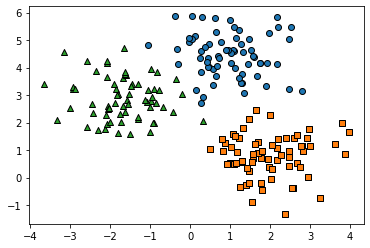

In [23]:
target_list=np.unique(y)
markers=['o','s','^','P','D','H','x']

for target in target_list:
  target_cluster=clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'],edgecolor='k',marker=markers[target])
plt.show()

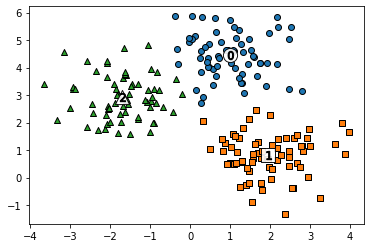

In [33]:
kmeans=KMeans(n_clusters=3, init='k-means++', n_init=10,random_state=0)
cluster_labels=kmeans.fit_predict(X)
clusterDF['kmeans_label']=cluster_labels

centers=kmeans.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','P','D','H','x']

for label in unique_labels:
  label_cluster=clusterDF[clusterDF['kmeans_label']==label]
  center_x_y=centers[label]
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolors='k',
              marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='white',
              alpha=0.9,edgecolor='k',marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,color='k',
              marker='$%d$' % label)
plt.show()

In [34]:
kmeans.cluster_centers_

array([[ 0.990103  ,  4.44666506],
       [ 1.95763312,  0.81041752],
       [-1.70636483,  2.92759224]])

In [35]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64
